In [1]:
from cellpose.models import CellposeModel
import tifffile
import numpy as np
from skimage.transform import downscale_local_mean, rescale, resize
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
datapath = Path(r"E:\Harrison\fly_revision_experiments\20251218b_onvsoff\eval")
example_tifs = datapath.glob("*.tif")

model = CellposeModel(pretrained_model="embryomodel", gpu=True)




(100, 100)
0.30545289241438744


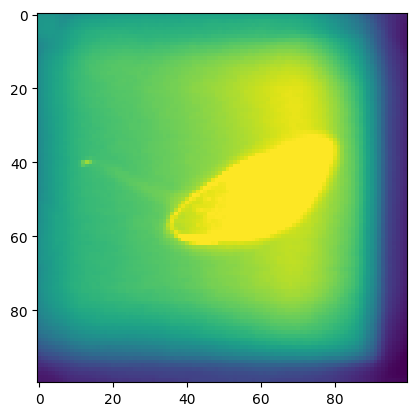

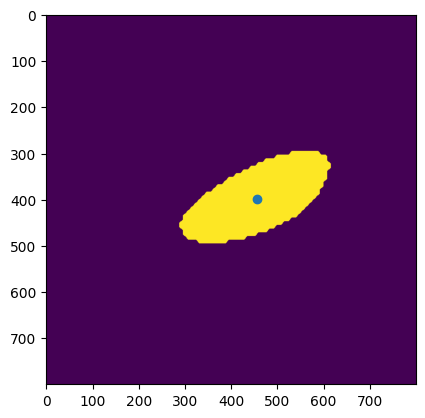

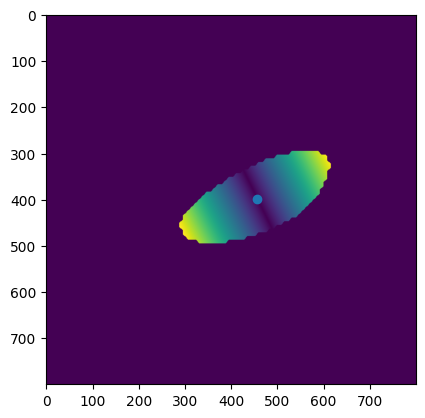

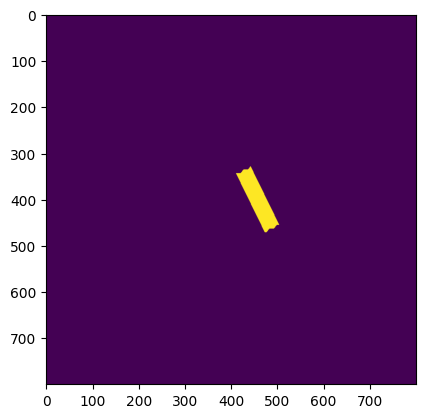

(100, 100)
0.5095872399170288


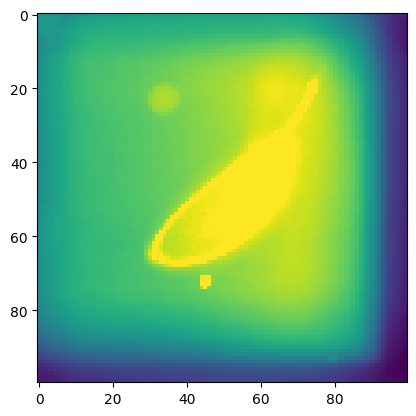

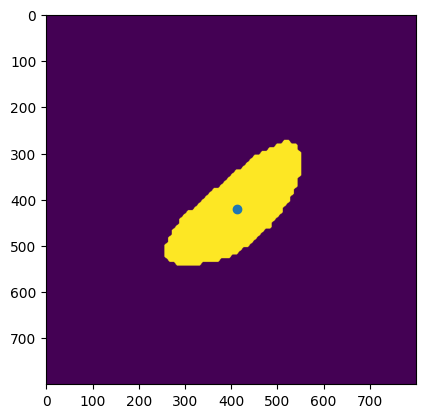

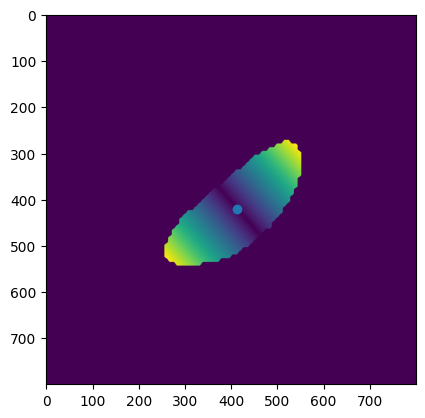

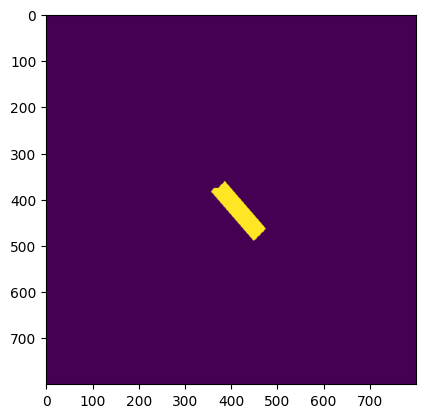

(100, 100)
0.24885959268471158


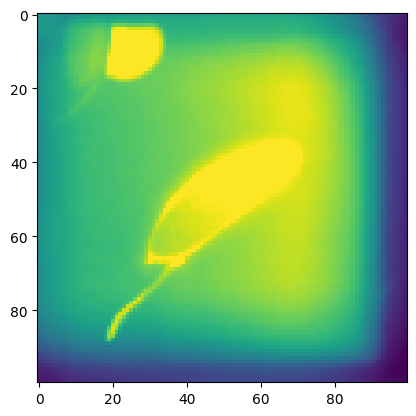

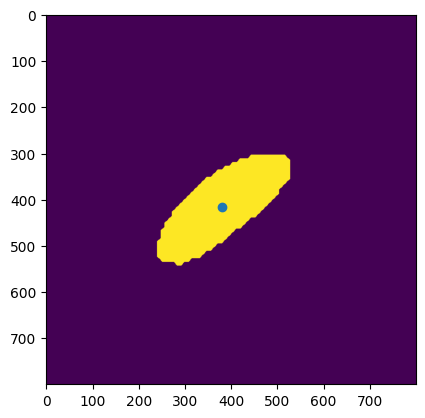

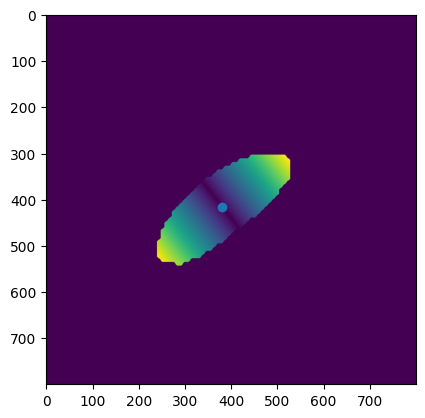

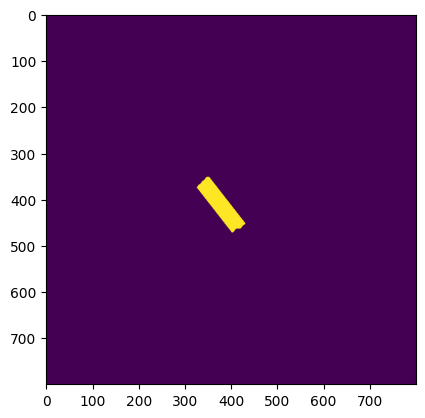

(100, 100)
0.3099670534826261


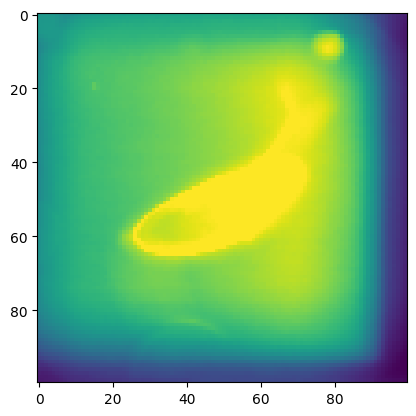

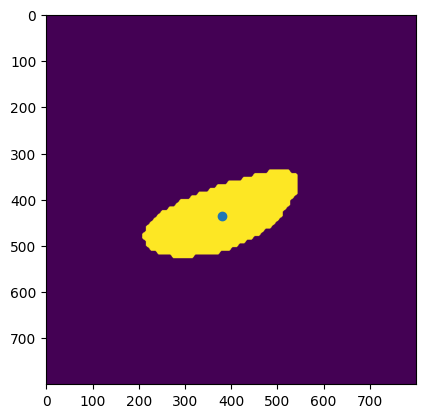

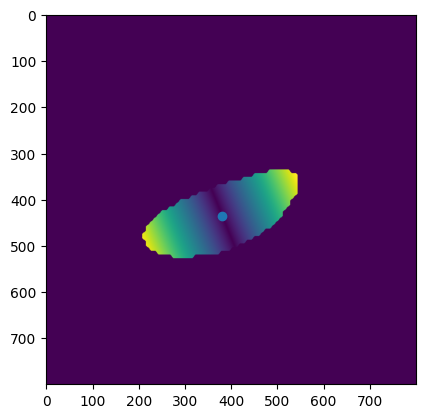

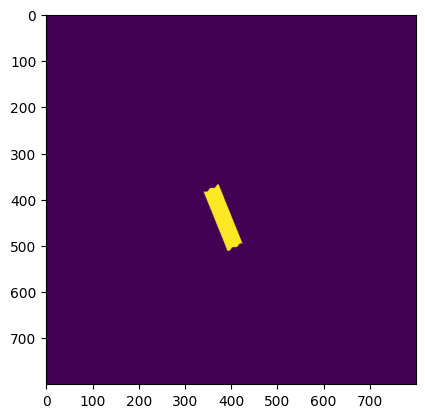

(100, 100)
0.2171753608054532


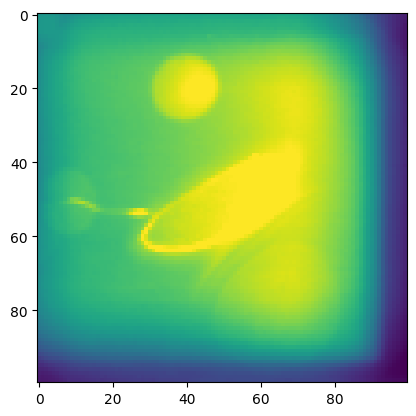

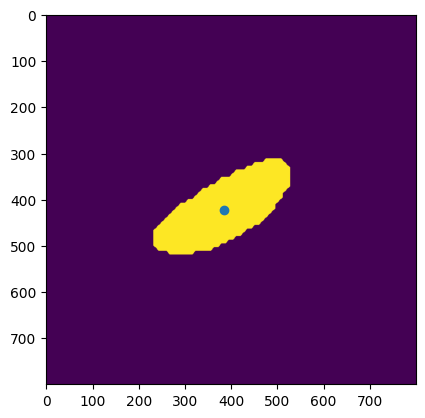

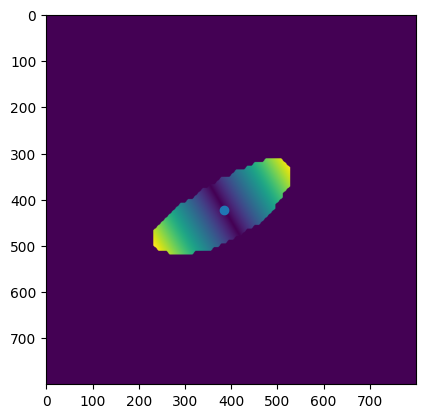

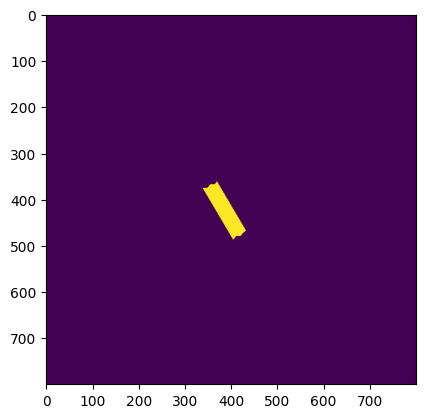

(100, 100)
0.23663119159638785


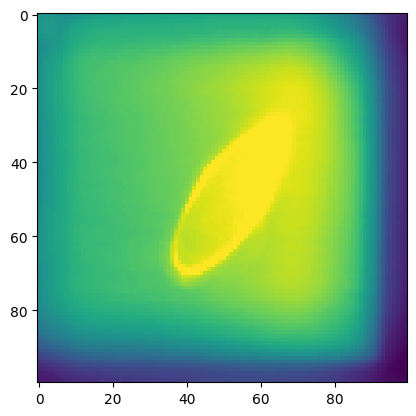

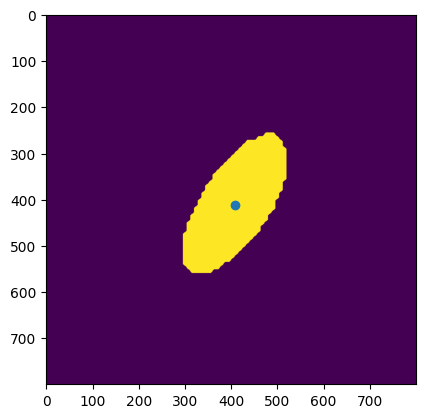

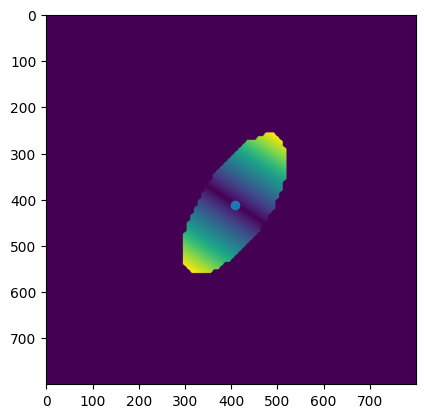

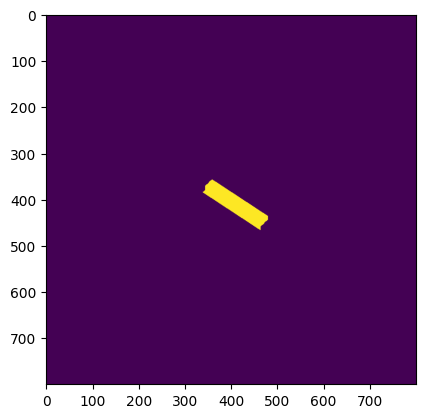

(100, 100)
0.20301136790124508


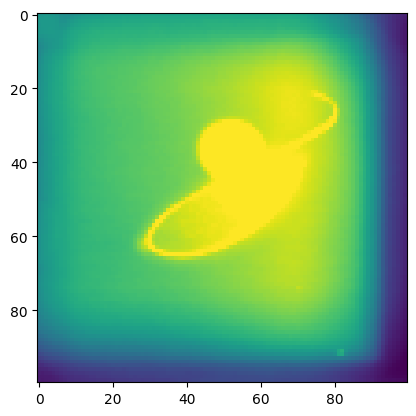

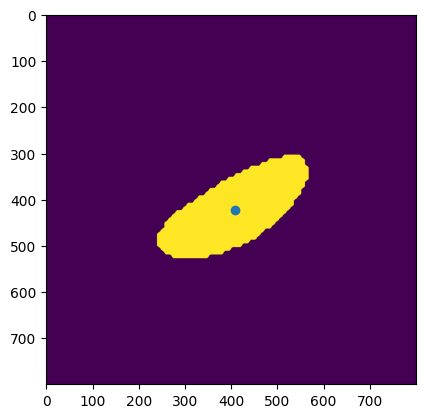

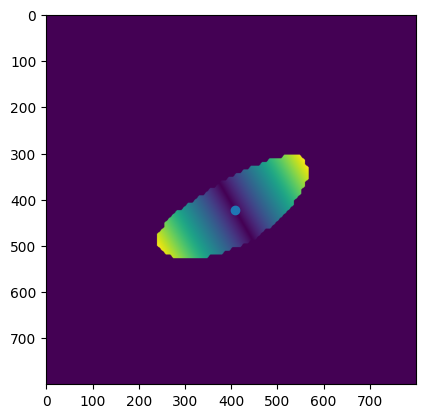

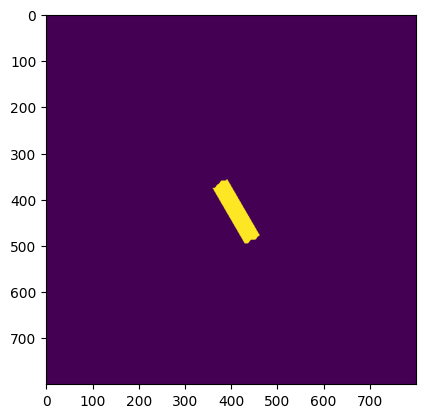

(100, 100)
0.21999856986355334


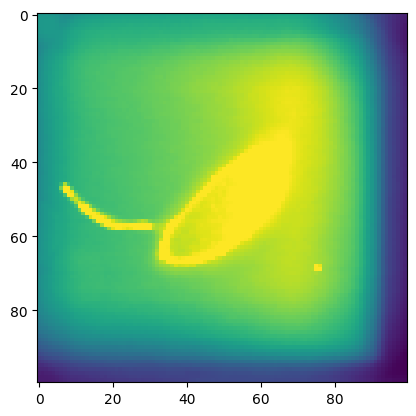

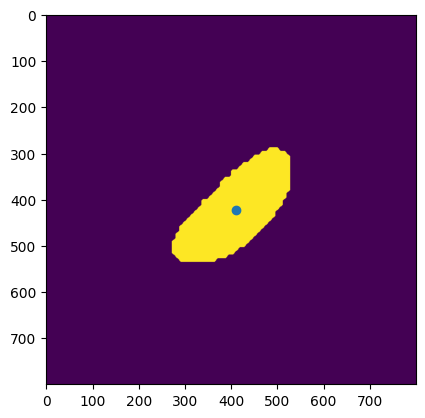

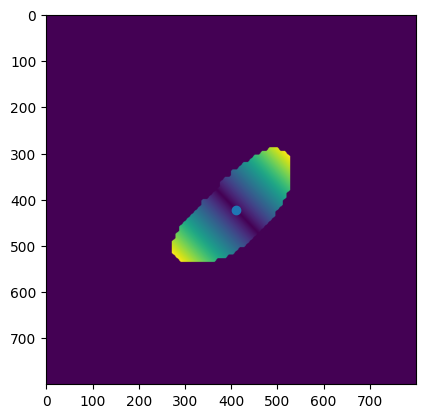

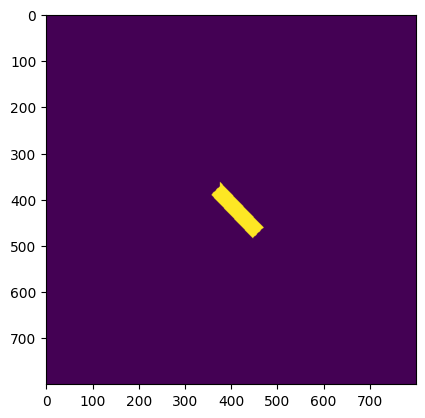

(100, 100)
0.2040628853008999


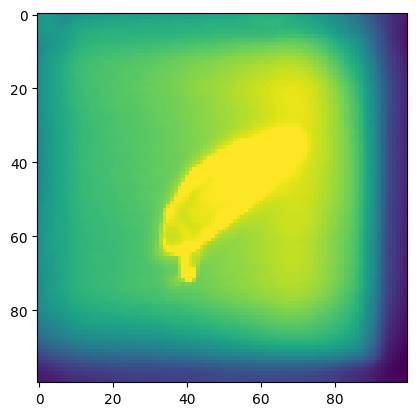

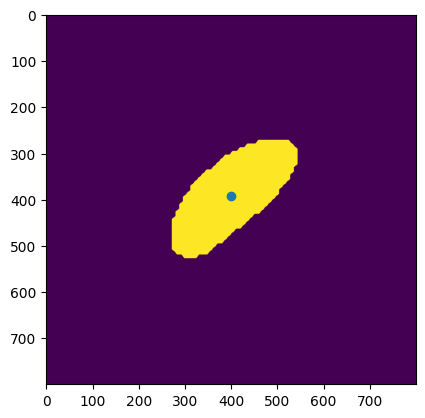

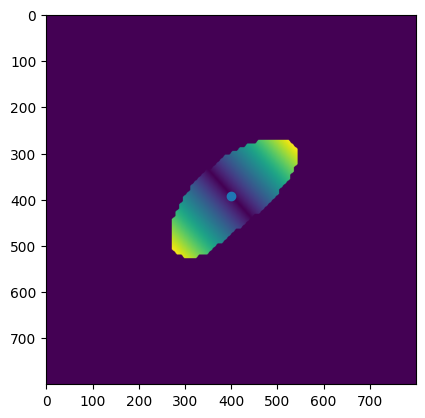

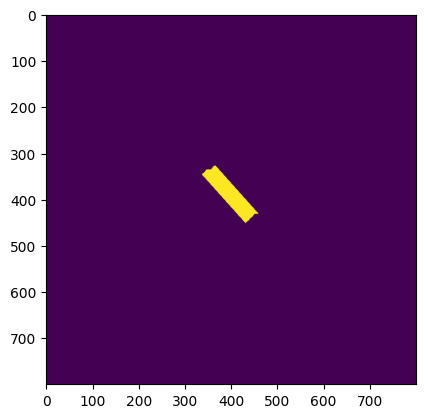

(100, 100)
0.29145257832346616


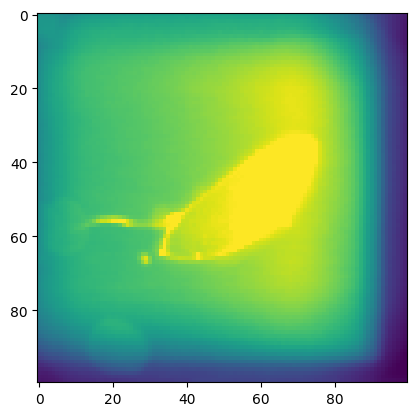

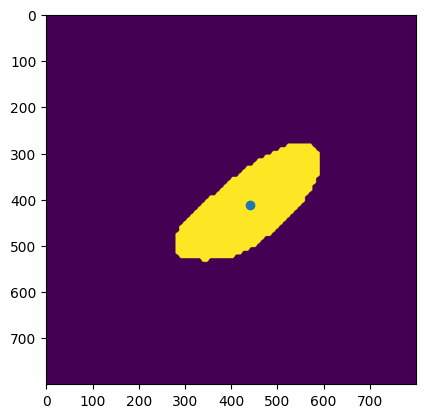

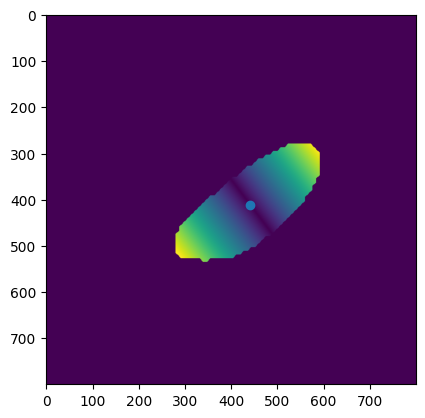

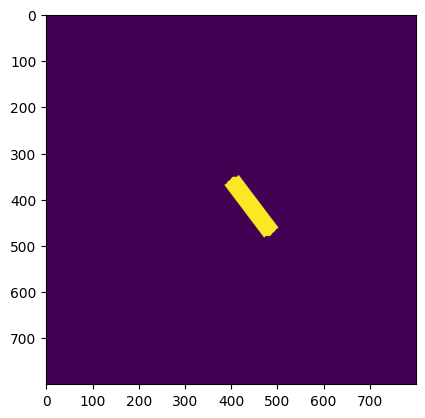

(100, 100)
0.5991664711066604


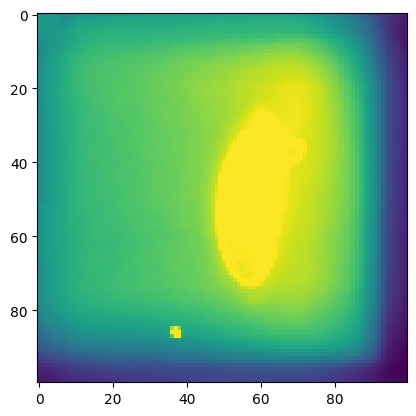

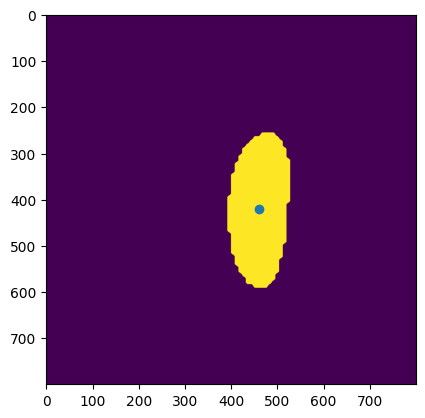

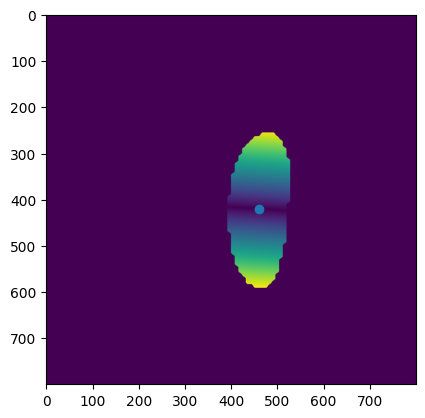

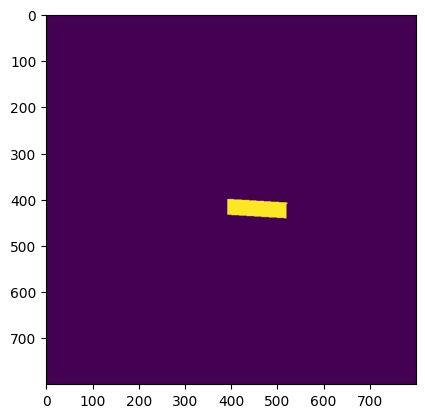

(100, 100)
0.19114765928912605


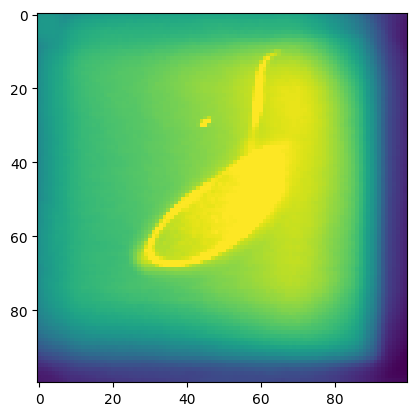

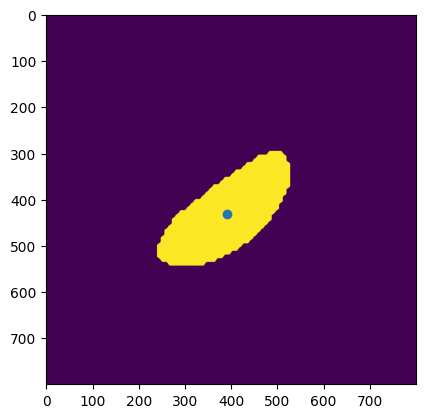

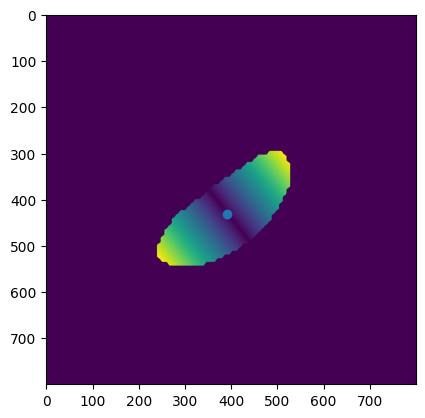

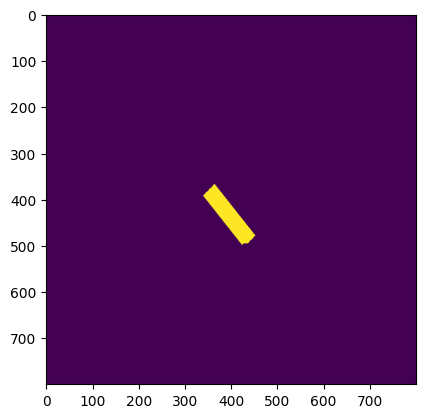

(100, 100)
0.2534290021771375


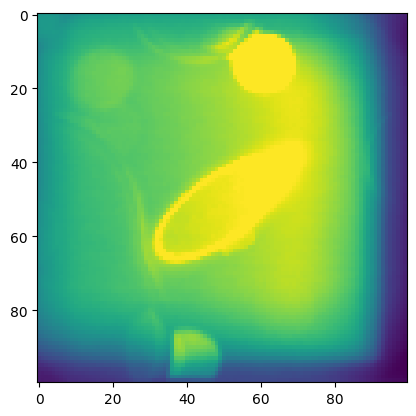

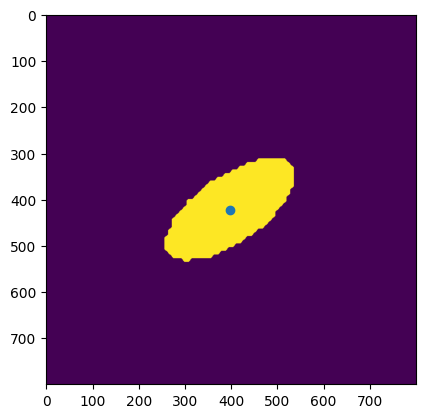

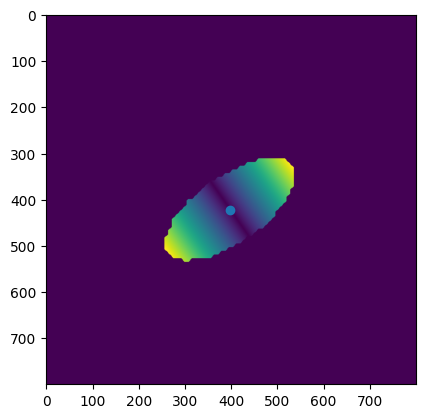

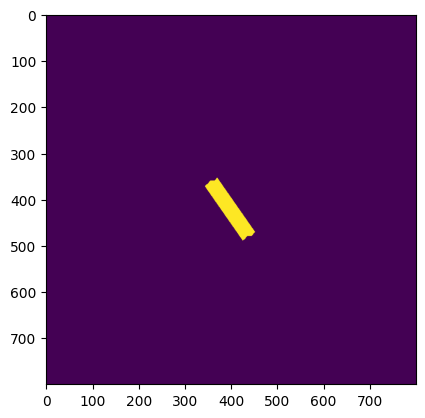

(100, 100)
0.20565938290095004


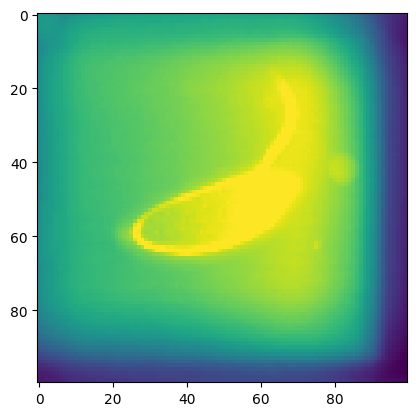

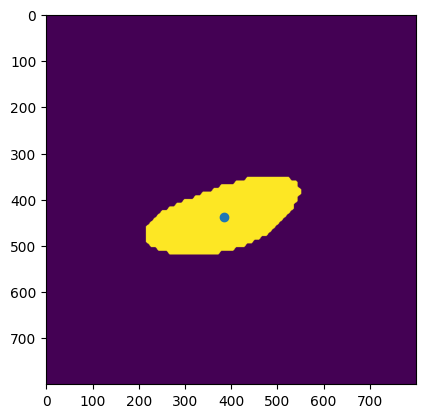

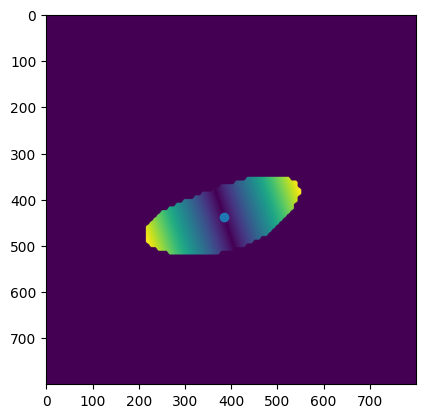

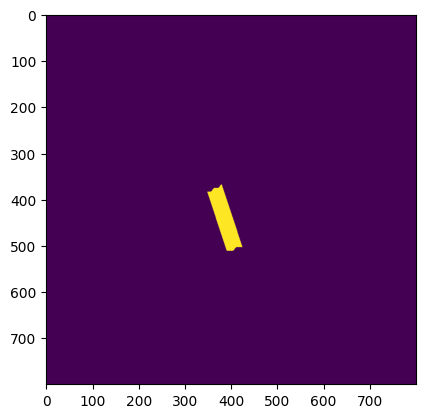

(100, 100)
0.28964457775390623


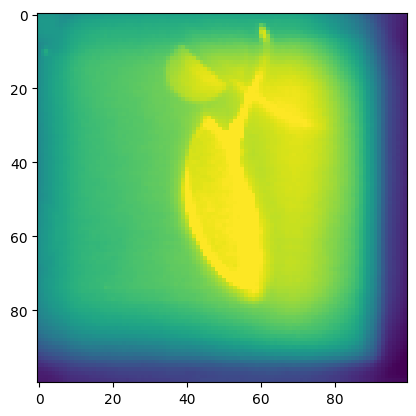

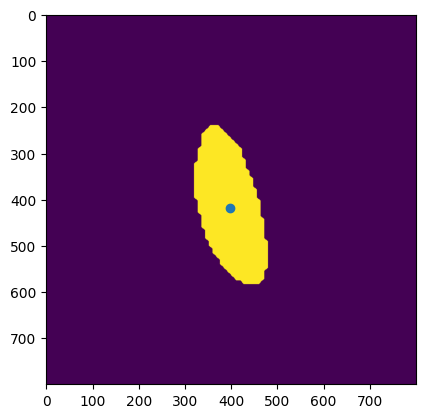

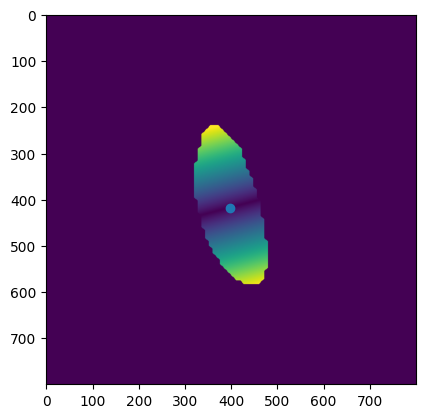

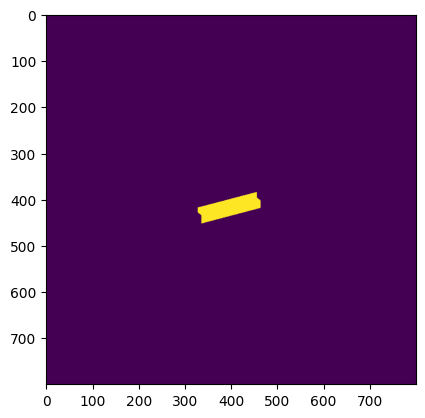

(100, 100)
0.4381681018520829


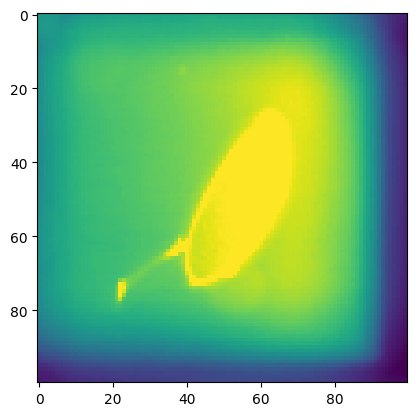

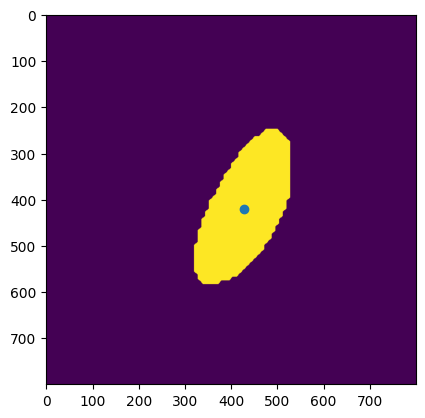

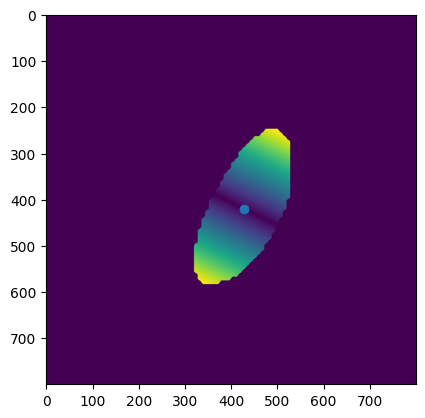

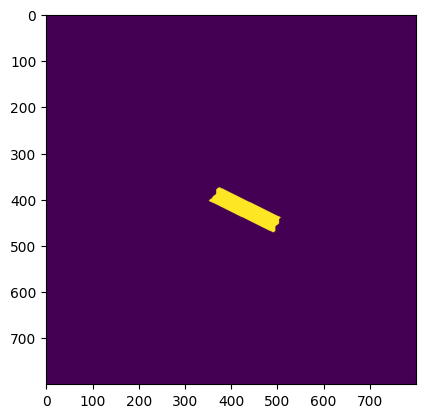

In [6]:
from skimage.measure import regionprops, label

example_tifs = datapath.glob("*.tif")
data_savepath = Path(r"C:\Users\Nikon\Desktop\Code\embryo_segmentation_cellpose\data")

for tifpath in example_tifs:
    arr = tifffile.imread(tifpath)
    initial_frame = arr[0]

    downscaled_frame = resize(initial_frame, (100, 100))
    print(downscaled_frame.shape)

    print(downscaled_frame.max())

    plt.imshow(downscaled_frame, vmax=0.15)
    plt.show()

    out = model.eval(downscaled_frame, normalize={"lowhigh": [0, 0.15]})

    mask = out[0] > 0

    tifffile.imwrite(data_savepath / f"{tifpath.stem}.tif", downscaled_frame)

    big_mask = resize(mask.astype(float), initial_frame.shape, order=1) > 0.5

    plt.imshow(big_mask)

    labeled_mask = label(big_mask)

    props = regionprops(labeled_mask)

    biggest_prop = 0
    biggest_prop_area = 0

    for prop in props:
        if prop.area > biggest_prop_area:
            new_mask = labeled_mask == prop.label
            centroid = prop.centroid
            long_axis = (np.sin(prop.orientation), np.cos(prop.orientation))
            axis_length = prop.axis_major_length

    plt.imshow(new_mask)
    plt.scatter(centroid[1], centroid[0])
    plt.show()


    arange = np.arange(big_mask.shape[0])
    yy, xx = np.meshgrid(arange, arange)

    mag = (yy - centroid[1]) * long_axis[0] + (xx - centroid[0]) * long_axis[1]

    mag = np.abs(mag) / (axis_length / 2)
    mag = mag * new_mask

    plt.imshow(mag, vmax=1.0)
    plt.scatter(centroid[1], centroid[0])
    plt.show()

    plt.imshow((mag < 0.1) * big_mask)
    plt.show()